In [9]:
%matplotlib inline
from matplotlib.pyplot import *

import numpy as np
import scipy as sp
import pandas as pd
from datetime import datetime
from functools import reduce

import scipy.stats

def returns(vec):
    return (vec[1:] - vec[:-1]) / vec[:-1]

In [86]:
# 10 year tresury
# source: https://fred.stlouisfed.org/series/GS10
t10 = pd.read_csv("GS10.csv")

# Consumer Price Index for All Urban Consumers: All Items Less Food and Energy
# source: https://fred.stlouisfed.org/series/CPILFENS
cpi = pd.read_csv("CPILFENS.csv")

# Effective Federal Funds Rate
# source: https://fred.stlouisfed.org/series/FEDFUNDS
fed = pd.read_csv("FEDFUNDS.csv")

data = reduce(lambda left, right: left.merge(right, on='DATE', how='outer'), [t10, cpi, fed])

data['DATE'] = pd.to_datetime(data.DATE)

In [90]:
# Add in calculated components
data['no_years_to_10'] = np.log(2.0) / np.log(1 + rate/100)

## Cover art

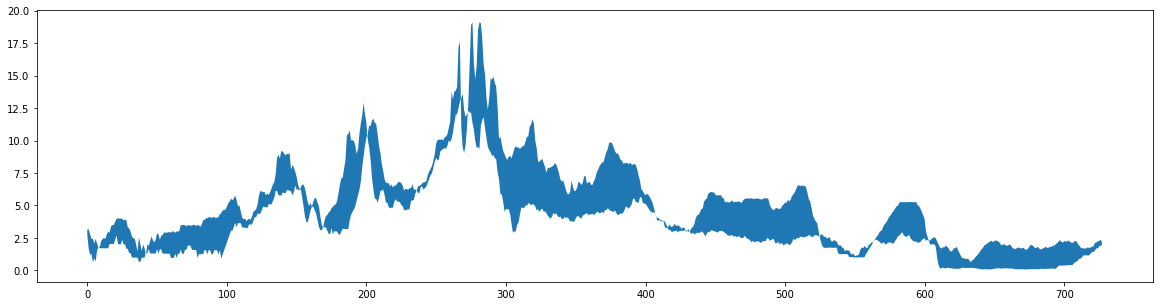

In [69]:
sub = data[['DATE', 'FEDFUNDS', 'CPILFENS_PC1']].dropna()
x = np.arange(0, len(sub), 1)

figure(figsize=(20, 5))

fill_between(x, sub.FEDFUNDS, sub.CPILFENS_PC1.values)

savefig('funky.svg')

## Interest rates

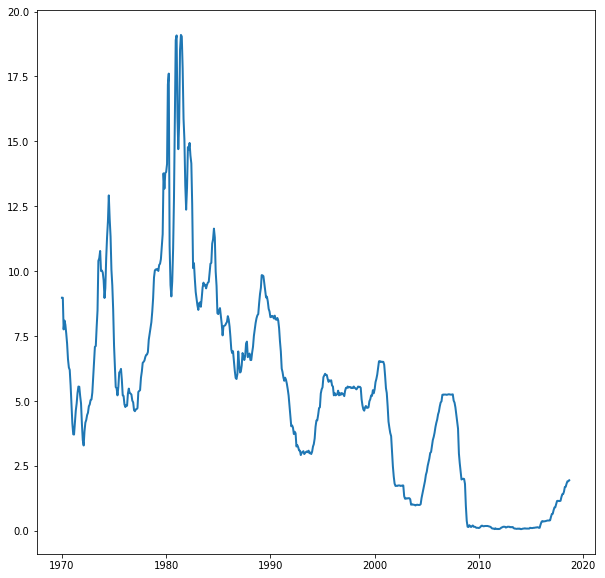

In [84]:
sub = data[['DATE', 'FEDFUNDS']].dropna()
sub = sub[sub.DATE >= '1970-01-01']

figure(figsize=(10, 10))

plot(sub.DATE, sub.FEDFUNDS, linewidth=2)

xticks([
    datetime(1970, 1, 1),
    datetime(1980, 1, 1),
    datetime(1990, 1, 1),
    datetime(2000, 1, 1),
    datetime(2010, 1, 1),
    datetime(2020, 1, 1),
])

savefig('interest.svg')

# 1980s

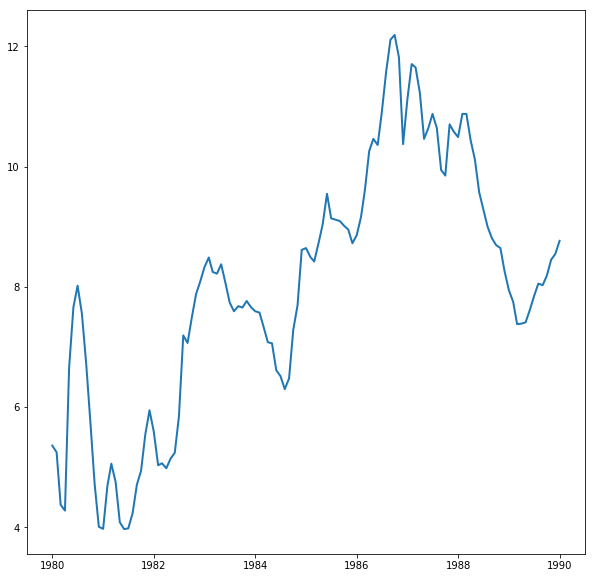

In [93]:
sub = data[['DATE', 'no_years_to_10']].dropna()
sub = sub[sub.DATE >= '1980-01-01']
sub = sub[sub.DATE <= '1990-01-01']

figure(figsize=(10, 10))

plot(sub.DATE, sub.no_years_to_10, linewidth=2)

savefig('1980s.svg')

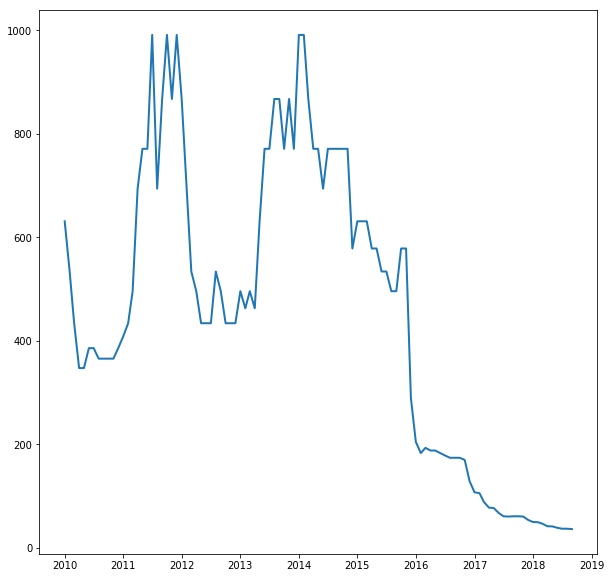

In [103]:
sub = data[['DATE', 'no_years_to_10']].dropna()
sub = sub[sub.DATE >= '2010-01-01']
sub = sub[sub.DATE <= '2020-01-01']

figure(figsize=(10, 10))

plot(sub.DATE, sub.no_years_to_10, linewidth=2)

In [104]:
data

,DATE,GS10,CPILFENS_PC1,FEDFUNDS,no_years_to_10
0,1953-04-01,2.83,NaN,NaN,NaN
1,1953-05-01,3.05,NaN,NaN,NaN
2,1953-06-01,3.11,NaN,NaN,NaN
3,1953-07-01,2.93,NaN,NaN,NaN
4,1953-08-01,2.95,NaN,NaN,NaN
5,1953-09-01,2.87,NaN,NaN,NaN
6,1953-10-01,2.66,NaN,NaN,NaN
7,1953-11-01,2.68,NaN,NaN,NaN
8,1953-12-01,2.59,NaN,NaN,NaN
9,1954-01-01,2.48,NaN,NaN,NaN


In [112]:
sub = data[['DATE', 'FEDFUNDS']].dropna()
sub = sub[sub.DATE >= '1980-01-01']

print("Min years to double money: {}".format(
    np.log(2.0) / np.log(1 + sub.max().FEDFUNDS /100)
))

print("Max years to double money: {}".format(
    np.log(2.0) / np.log(1 + sub.min().FEDFUNDS /100)
))

Min years to double money: 3.96552510157
Max years to double money: 990.556791114


In [106]:
1.0007**1000

2.0132596285517015